<a href="https://colab.research.google.com/github/ernestopalacios/07MBID/blob/main/AG2_ErnestoPalacios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>PRÁCTICA 2: APRENDIZAJE SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Ernesto Palacios Merino

**Usuario VIU:** epalaciosm@student.universidadviu.com

<font color="green">*\[\[IMPORTANTE: Este notebook debe usarse como plantilla para empezar esta práctica. Antes de entregar el notebook, se deben eliminar todas las líneas de texto entre dobles corchetes como esta.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Se debe leer y comprender esta plantilla de principio a fin antes de empezar. En estas líneas con anotaciones se resuelven las dudas y errores más comunes de la elaboración de esta práctica.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Todas las secciones definidas en esta plantilla deben estar presentes en la entrega final y respetarse para facilitar la corrección, aunque cada estudiante puede añadir las subsecciones que considere. Los huecos para rellenar al principio del notebook, la tabla de la sección "Conclusiones" y las capturas de pantalla con el nombre de usuario y puntuaciones de DrivenData de la sección "Competición" también son obligatorios.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Se debe entregar un único notebook de Jupyter (fichero *.ipynb) con la práctica desarrollada y los resultados ejecutados. Debe estar autocontenido, ya que no se corregirá nada más que este fichero entregado. Las capturas con la puntuación de DrivenData y el nombre de usuario de las pruebas se deben incrustar en la sección "Competición".\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Aunque los resultados de las ejecuciones deben figurar en el notebook, todo el código debe ser ejecutable y reproducible por el profesor en su sesión de Google Colab (no se admiten imágenes con resultados o piezas de código). Se aconseja que se fije una semilla aleatoria única para todos los procesos estocásticos que se vayan a llevar a cabo.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: El fichero *.ipynb, antes de corregirse, se pasará por un detector de plagios específico para estos notebooks de Jupyter con el fin de evitar cualquier tipo de fraude. Los resultados de este detector se revisarán manualmente por lo que se sugiere que el alumno especifique la fuente de los algoritmos (si son de la web) a fin de evitar problemas (no hará falta si son pequeños fragmentos de otras prácticas en las que participó el mismo alumno). Si se demuestra copia de toda o parte de esta práctica de otros alumnos de esta asignatura, en la convocatoria/edición de la asignatura actual o cualquiera anterior de la asignatura, implicará un suspenso con 0 para todas las partes implicadas y la apertura de un expediente.\]\]*</font>

---
# Resumen
---

<font color="green">*\[\[Describir qué se va a hacer en esta práctica, mencionar las diferentes fases en las que se ha dividido la experimentación, así como las técnicas que se van a explicar en las siguientes secciones. Resumir también, muy brevemente, los principales resultados obtenidos.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Será necesario registrarse en la competición de DengAI de DrivenData para poder descargar el dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/ \]\]*</font>

---
# Inicialización
---

In [1]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

# Dependencias propias
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns


def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df

def download_predictions(test, pred_total_cases):
  file_name = "practica2_pred_" + time.strftime("%Y") + time.strftime("%m") + time.strftime("%d") + time.strftime("%H") + time.strftime("%M") + time.strftime("%S") + ".csv"
  predictions = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': pred_total_cases})
  with open(file_name, 'w') as f:
    predictions.to_csv(f, index = False)
  files.download(file_name)
  print("Downloaded " + file_name)

In [2]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train_feat = upload_files()
print(train_feat.shape)
train_feat.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
# Subir la variable objetivo total_cases del conjunto de entrenamiento (dengue_labels_train.csv)
train_labels = upload_files()

# Unificar el conjunto de entrenamiento (características + variable objetivo)
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
print(train.shape)
train.head()

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes
(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
# Subir el conjunto de test sin variable objetivo (dengue_features_test.csv)
test = upload_files()
print(test.shape)
test.head()

Saving dengue_features_test.csv to dengue_features_test.csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes
(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


---
# Reexploración
---

<font color="green">*\[\[Se hará una expansión del análisis exploratorio razonado del dataset que se hizo en la Práctica 1, ahora teniendo en cuenta también la variable objetivo. Las conclusiones de esta expansión del análisis podrían servir para refinar la selección de características, generar características derivadas adicionales, descartar outliers, así como establecer un orden y estrategia de experimentación que después se respetará en la sección "Predicción".\]\]*</font>

<font color="green">*\[\[IMPORTANTE: DrivenData ofrece 2 conjuntos de datos de DengAI: training y test. Training tiene la variable objetivo "total_cases", que es la que los modelos intentarán predecir. Test, sin embargo, no tiene esas etiquetas y no estarán nunca disponibles. La forma de calcular el error sobre el conjunto de test es mediante el envío de un fichero .csv con las predicciones del conjunto de Test a la web de DrivenData. Solo esta web puede calcular el error sobre el conjunto de test. Los estudiantes solo podrán calcular, en sus ordenadores, el error sobre el conjunto de validación (que se obtendría simplemente mediante las folds del cross-validation, o bien separando manualmente una parte de los datos de training para este fin).\]\]*</font>

<font color="green">*\[\[IMPORTANTE: No basta con ejecutar los algoritmos y mostrar el resultado. Hay que comparar lo obtenido con los experimentos que se han hecho e ir extrayendo deducciones acerca de por qué un curso de experimentación fue o será mejor que otro.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Todos los gráficos que se representen en este notebook deben indicar claramente el título de cada eje de coordenadas.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: En este enlace se puede ver una descripción de qué significan las características del dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/ \]\]*</font>

<font color="green">*\[\[Aquí irían todas las funciones y transformaciones que permitirán el uso de los algoritmos de ML sobre el dataset.\]\]*</font>

## 1. Dividir el dataset por ciudades

En la primera parte determinamos que ambas ciudades tienen características diferentes.

Para nuestro análisis separaremos los datos para cada ciudad y ejecutaremos los mismos pasos en cada dataset,

In [100]:
# Divido el dataset para cada ciudad

sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']

<Axes: xlabel='city'>

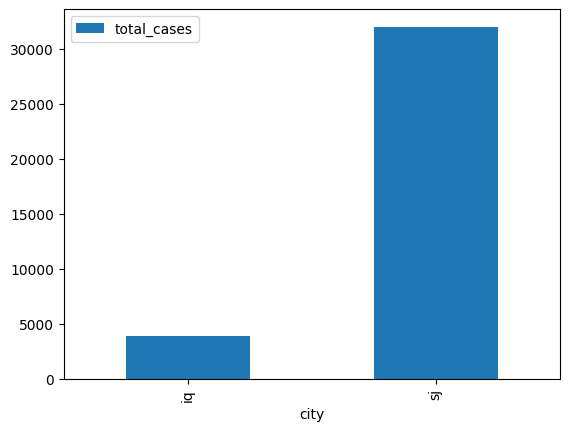

In [84]:
# Para tener una idea general vamos a visualizar los casos por ciudades

train[['city', 'total_cases']].groupby('city').sum().plot.bar()

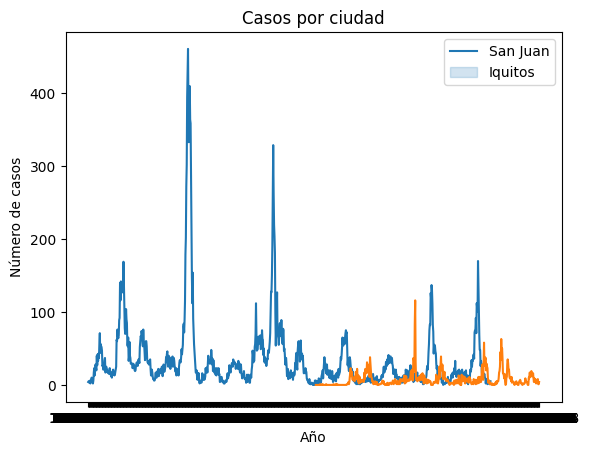

In [10]:
# Grafica de los casos para cada ciudad.
ax = plt.subplot()
sns.lineplot(data = sj_df, x = 'week_start_date', y = 'total_cases', ax = ax)
sns.lineplot(data = iq_df, x = 'week_start_date', y = 'total_cases', ax = ax)
ax.set_title('Casos por ciudad')
ax.set_ylabel('Número de casos')
ax.set_xlabel('Año')
ax.legend(['San Juan', 'Iquitos'])

## Tratamiento de datos faltantes

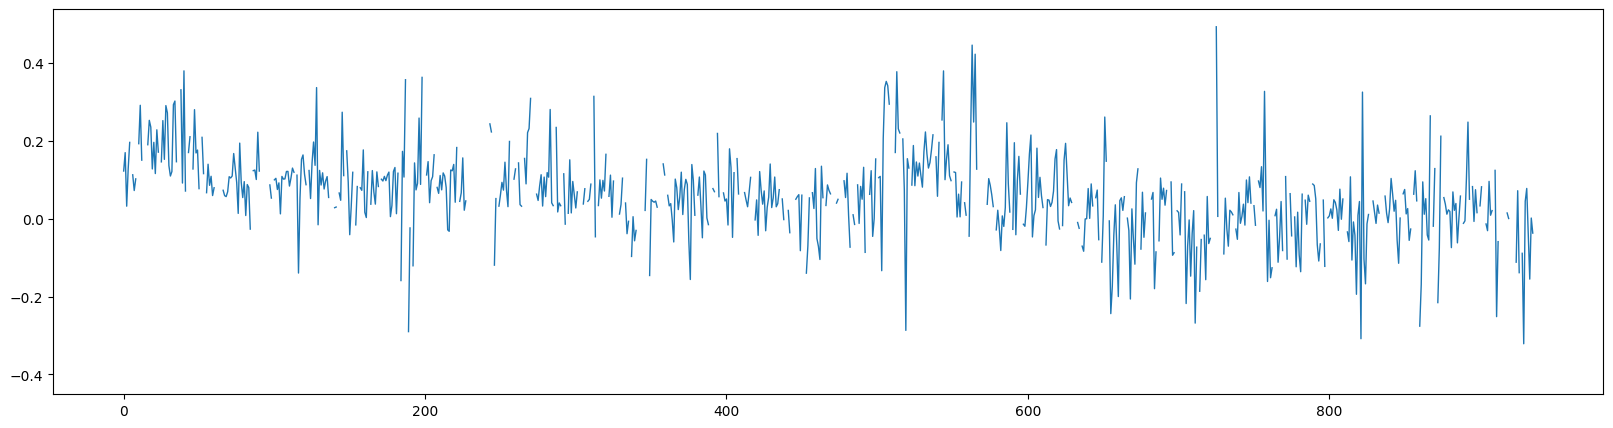

In [ ]:
plt.figure(figsize = (20, 5))
(sj_df
     .ndvi_ne
     .plot
     .line(lw = 1))

plt.show()

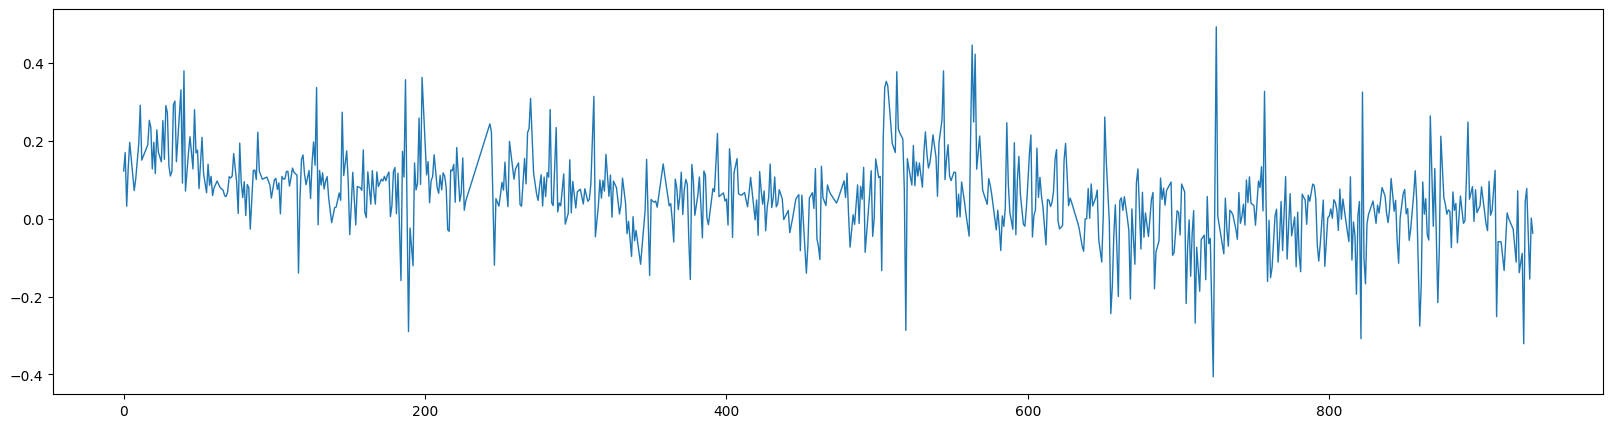

In [101]:
# Rellenamos los datos mediante una interpolación lineal

sj_df = sj_df.interpolate(method = 'linear')
iq_df = iq_df.interpolate(method = 'linear')

plt.figure(figsize = (20, 5))
(sj_df
     .ndvi_ne
     .plot
     .line(lw = 1))

plt.show()

## Correlación entre variables

Text(0.5, 1.0, 'Mapa de Correlacion arriba "San Juan" abajo "Iquitos"\n')

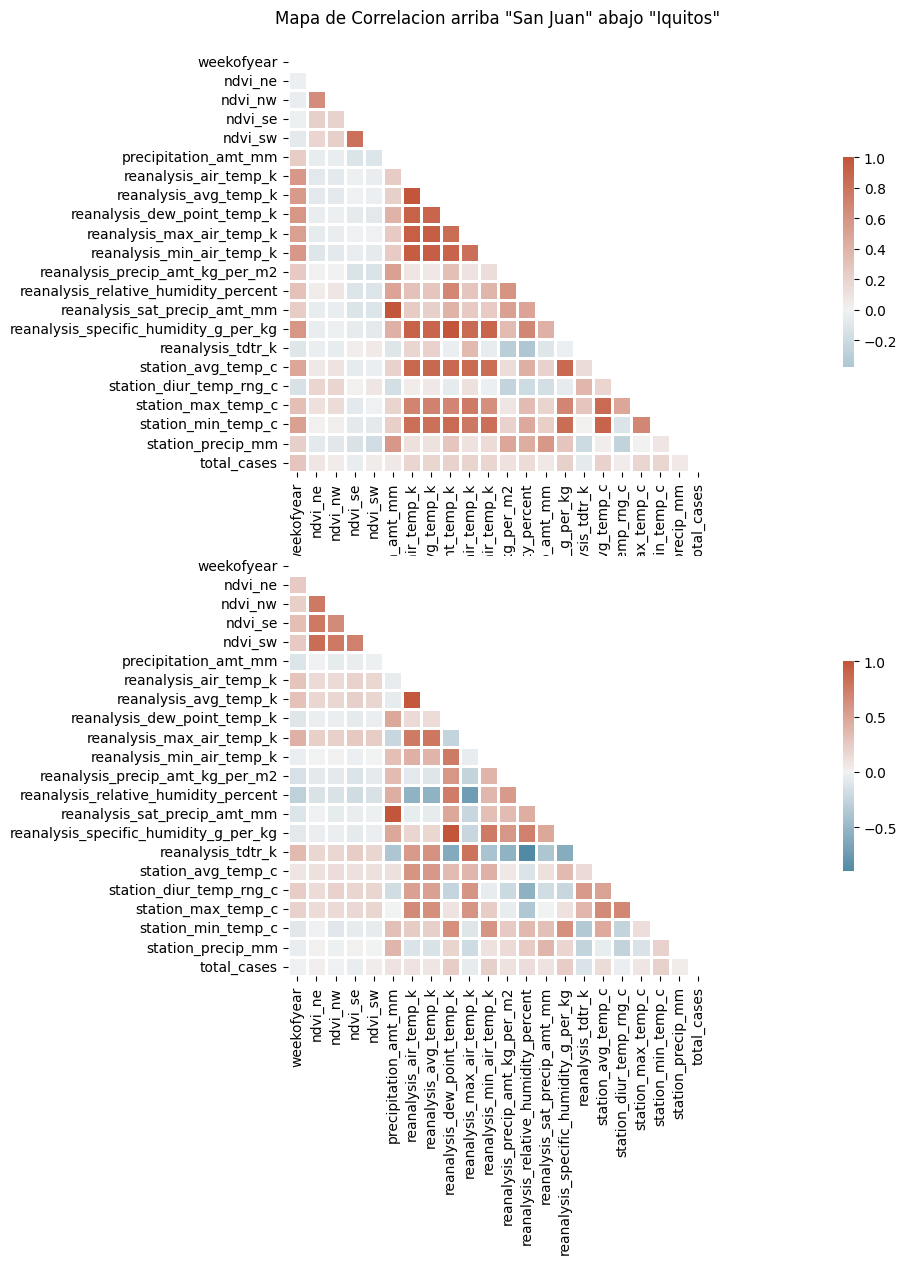

In [15]:
# Calcular la matriz de correlación
corr_sj = sj_df.drop(['city','year','week_start_date'], axis=1).corr()
corr_iq = iq_df.drop(['city','year','week_start_date'], axis=1).corr()


# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_sj, dtype=bool))

# Creamos los objetos subplot
fig, axs = plt.subplots( 2, 1, figsize = (35, 12))

# Mapeo de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creo las dos gráficas

sns.heatmap(corr_sj, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[0])
sns.heatmap(corr_iq, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[1])

axs[0].set_title('Mapa de Correlacion arriba "San Juan" abajo "Iquitos"\n')


```
Algunas conlcuiones de la gráfica de correlación.

- La variable objetivo no tiene una alta correlación con ninguna de las variables
  No hay correlación con weekofyear, es decir a primera vista no se trata de ciclos que se repitan cada año.

- Existen algunas variables redundantes.
  Ya las habiamos analizado en la Actividad 1.

- Podemos eliminar algunas variables redundantes simplificando nuestro dataset.
```

Vamos a eliminar las siguientes variables que consideramos redundantes:

1. 'station_avg_temp_c',
2. 'reanalysis_tdtr_k',
2. 'reanalysis_avg_temp_k',
3. 'reanalysis_air_temp_k',
4. 'reanalysis_relative_humidity_percent',
4. 'reanalysis_specific_humidity_g_per_kg'
5. 'reanalysis_precip_amt_kg_per_m2',
6. 'reanalysis_sat_precip_amt_mm',
7. 'weekofyear'
8. 'city'
9. 'year'
10. 'week_start_date'

In [102]:
features_to_drop = ['city','year','week_start_date','reanalysis_tdtr_k','reanalysis_relative_humidity_percent','station_avg_temp_c','reanalysis_avg_temp_k','reanalysis_air_temp_k','reanalysis_specific_humidity_g_per_kg','reanalysis_precip_amt_kg_per_m2','reanalysis_sat_precip_amt_mm','weekofyear']

sj_df = sj_df.drop(features_to_drop, axis=1)
iq_df = iq_df.drop(features_to_drop, axis=1)

features_to_drop

['city',
 'year',
 'week_start_date',
 'reanalysis_tdtr_k',
 'reanalysis_relative_humidity_percent',
 'station_avg_temp_c',
 'reanalysis_avg_temp_k',
 'reanalysis_air_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_sat_precip_amt_mm',
 'weekofyear']

Text(0.5, 1.0, 'Mapa de Correlacion arriba "San Juan" abajo "Iquitos"\n')

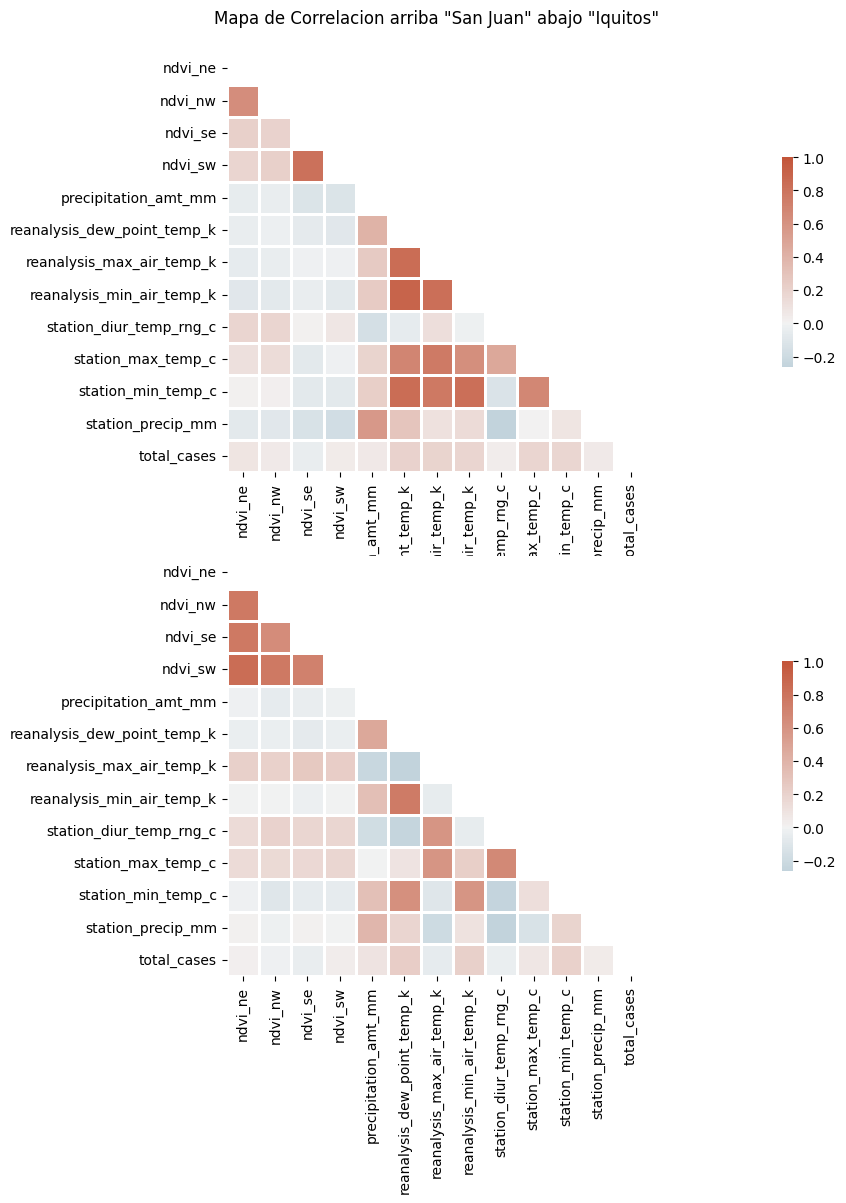

In [103]:
# Calcular la matriz de correlación
corr_sj = sj_df.corr()
corr_iq = iq_df.corr()


# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_sj, dtype=bool))

# Creamos los objetos subplot
fig, axs = plt.subplots( 2, 1, figsize = (35, 12))

# Mapeo de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creo las dos gráficas

sns.heatmap(corr_sj, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[0])
sns.heatmap(corr_iq, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[1])

axs[0].set_title('Mapa de Correlacion arriba "San Juan" abajo "Iquitos"\n')

## Normalización

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sj_normal = scaler.fit_transform(sj_df)
iq_normal = scaler.fit_transform(iq_df)

In [114]:
sj_normal

array([[0.58783972, 0.62676332, 0.52370092, ..., 0.28205128, 0.05230467,
        0.00867679],
       [0.64041572, 0.66981079, 0.43529974, ..., 0.56410256, 0.02811376,
        0.01084599],
       [0.48741177, 0.70428426, 0.42268026, ..., 0.64102564, 0.13533835,
        0.00867679],
       ...,
       [0.27905297, 0.45157859, 0.37510328, ..., 0.5       , 0.10035959,
        0.0021692 ],
       [0.45356528, 0.47530415, 0.53695564, ..., 0.5       , 0.03661327,
        0.00650759],
       [0.41043739, 0.4990297 , 0.22719909, ..., 0.70512821, 0.00098071,
        0.01084599]])

-------------------

# VAMOS HASTA AQUÍ

---
# Predicción
---

<font color="green">*\[\[Esta es la sección más importante de esta práctica. Aquí se irán describiendo y ejecutando los distintos experimentos, incluyendo la optimización de hiperparámetros, intercalando celdas de texto y código.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Cada modelo descrito debe tener un nombre (RandomForest-A, RandomForestB... por ejemplo) que sirva para identificarlo en la tabla resumen de la sección "Conclusiones".\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Al igual que en el resto de análisis, no sirve ejecutar los algoritmos sin más, como si fueran una caja negra, sino que hay que discutir y razonar los resultados de forma que vayan guiando el discurso de la práctica en cada paso siguiente.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Asimismo, cada prueba descrita debe figurar en el notebook y ser ejecutable. No sirve comentar o mostrar resultados de pruebas que no estén programadas en este mismo notebook y que sean reproducibles por el profesor.\]\]*</font>

<font color="green">*\[\[Será necesario probar y describir en la memoria varios algoritmos de ML, analizar los resultados, replantear las características seleccionadas (si procede), elegir al menos un algoritmo prometedor de entre los probados y por último optimizar bien sus hiperparámetros.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: El algoritmo LinearRegression aquí mostrado como ejemplo NO se tendrá en cuenta a la hora de corregir. Únicamente podría ser útil para tener una línea de base sobre la que comparar los algoritmos que hemos visto en clase u otros de ML que el estudiante quiera explorar aquí.\]\]*</font>

In [ ]:
# EJEMPLO: Ejecución del algoritmo de ML LinearRegression y generación de su modelo
# NO SE TENDRÁ EN CUENTA PARA EVALUAR LA PRÁCTICA 2
# Nombre del modelo: "LinearRegressionA"
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predicción sobre el conjunto de test
y_pred = model.predict(X_test)
y_pred

array([ 25.06379009,  29.66502706,  31.71595663,  43.78861089,
        35.91356158,  48.98600874,  36.65691557,  41.46994145,
        38.03226533,  47.21983447,  40.40149043,  55.26418902,
        41.50037817,  46.10677278,  36.6084963 ,  43.53840459,
        38.83339625,  38.35240756,  39.26705283,  29.16888669,
        40.41542296,  29.76442752,  22.39307521,  41.84902089,
        30.9576386 ,  35.41705319,  39.94156411,  42.70291184,
        39.37127397,  35.86212756,  33.44942516,  24.01866179,
        29.7079741 ,  25.42490693,  15.67287652,  15.67287652,
        15.88919674,  30.50479935,  27.00408496,  26.40760293,
        27.21238137,  26.57127183,  24.80337951,  16.71541157,
        25.30137909,  21.16374371,  17.25305029,  19.24466784,
        16.50323884,  24.40641963,  32.90386301,  28.35788315,
        29.16124461,  29.18808217,  38.36852973,  34.34572346,
        38.99817745,  35.16425444,  40.10293956,  42.97721303,
        41.67790538,  52.70353895,  36.86337983,  52.83

<font color="green">*\[\[Postprocesar el resultado.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: DrivenData necesita que el orden de las predicciones sea el mismo que en el fichero de test, así como que se una predicción por cada instancia de test. Sino, la web no aceptará el fichero de la submission.\]\]*</font>

In [ ]:
# EJEMPLO: Redondear el resultado y convertirlo a entero
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

# EJEMPLO: Cambiar valores negativos a cero
res[y_pred < 0] = 0
res

array([25, 30, 32, 44, 36, 49, 37, 41, 38, 47, 40, 55, 42, 46, 37, 44, 39,
       38, 39, 29, 40, 30, 22, 42, 31, 35, 40, 43, 39, 36, 33, 24, 30, 25,
       16, 16, 16, 31, 27, 26, 27, 27, 25, 17, 25, 21, 17, 19, 17, 24, 33,
       28, 29, 29, 38, 34, 39, 35, 40, 43, 42, 53, 37, 53, 40, 36, 49, 45,
       49, 55, 39, 31, 44, 37, 47, 51, 47, 39, 44, 46, 31, 37, 34, 37, 36,
       29, 33, 33, 26, 18, 29, 35, 13, 24, 25, 28, 31, 11, 19, 26, 36, 25,
       20, 32, 33, 29, 36, 43, 37, 42, 43, 45, 33, 33, 38, 33, 32, 29, 43,
       41, 43, 41, 37, 41, 38, 43, 40, 43, 37, 41, 38, 30, 33, 32, 28, 20,
        5, 34, 21, 33, 19, 24, 29, 21, 21, 24, 33, 29, 20, 18, 16, 18, 19,
       26, 27, 31, 34, 37, 34, 21, 18, 40, 20, 28, 25, 30, 39, 34, 32, 46,
       39, 28, 33, 40, 30, 42, 49, 32, 39, 36, 35, 35, 37, 31, 33, 37, 37,
       31, 27, 35, 29, 30, 31, 25, 29, 20, 24, 25, 28, 20, 28, 29, 32, 30,
       32, 32, 39, 35, 22, 42, 35, 41, 42, 42, 42, 47, 54, 50, 47, 35, 51,
       47, 47, 43, 33, 51

<font color="green">*\[\[Para evaluar el MAE en el conjunto de test (o lo que es lo mismo, la puntuación de la competición), será necesario registrarse en la competición e ir subiendo a DrivenData ( https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/ ) las predicciones de los modelos en un fichero .csv que respete el Submission Format (máximo 3 veces al día). La puntuación devuelta por DrivenData corresponde precisamente con el MAE sobre el conjunto de test.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Hacer submissions a DrivenData con las predicciones es imprescindible en este caso, ya que el MAE sobre el conjunto de test no lo puede calcular el estudiante, debido a que el conjunto de test no tiene las etiquetas (variable objetivo). Estas etiquetas existen, pero son secretas y solo las conocen los organizadores de la competición de DrivenData. Sino, los participantes podrían enviar simplemente un .csv con las etiquetas y obtener una puntuación perfecta sin hacer nada de ML.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: DrivenData necesita que el orden de las predicciones sea el mismo que en el fichero de test, así como que se una predicción por cada instancia de test. Sino, la web no aceptará el fichero de la submission.\]\]*</font>

In [ ]:
download_predictions(test, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231020153514.csv


---
# Conclusiones
---

<font color="green">*\[\[Plantilla con ejemplos de la tabla que hay que rellenar resumiendo todos los experimentos descritos en la memoria. Los identificadores de cada modelo deben coincidir con los desarrollados en la sección "Predicción".\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Los resultados de MAE deben tener 4 decimales.\]\]*</font>

| Modelo | MAE test (DrivenData) | MAE validación | Algoritmo | Hiperparámetros | Descripción
| --- | --- | --- | --- | --- | --- |
| Final | 26,1234 | 20,1234 | Algoritmo1 | hp1=0,2; hp2=3 | ....
| A | 27,1234 | 15,1234 | Algoritmo1 | hp1=0,2; hp2=3 | ...
| B | 28,1234 | 18,1234 | Algoritmo2 | hp1=0,2; hp2=3 | ...
| ...


**Modelo final elegido**
* Nombre/Identificador:
* MAE test (DrivenData):
* MAE validación:
* Algoritmo ML:
* Hiperparámetros:
* Lista de características:
* Resumen del dataset (transformaciones aplicadas, etc.):

<font color="green">*\[\[Discusión final de los resultados de todos los modelos descritos en la memoria, justificando la elección del modelo final.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Para esta práctica, una puntuación del modelo final mayor o igual a 28,9111 (ya que es la que se obtiene simplemente ejecutando esta plantilla) previsiblemente implicará un suspenso. Una puntuación final menor que 25 se considera muy buena.\]\]*</font>

<font color="green">*\[\[Discutir trabajo futuro: Mejoras del trabajo realizado que podrían llevarse a cabo pero que no se consideran parte de esta entrega.\]\]*</font>

---
# Competición
---

<font color="green">*\[\[Incrustar aquí una o varias capturas de pantalla de DrivenData con un listado de puntuaciones obtenidas en el que aparezca (resaltada) la correspondiente al modelo final, así como los nombres de usuario
 utilizados en DrivenData (pueden ser varios).\]\]*</font>

 <font color="green">*\[\[IMPORTANTE: No incrustar la captura de pantalla con el nombre de usuario y el resultado del mejor modelo implicará no puntuar en el apartado destinado al MAE.\]\]*</font>